In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from mylib import *
import os
import seaborn as sns

sns.set_theme()

plt.rcParams["font.family"] = "SimSun"
plt.rcParams["axes.unicode_minus"] = False

os.environ["MYLIB_DATASETS_DIR"] = "../dataset/data/"

dfs = [load_dataset(ds) for ds in DataSet]
for df in dfs:
    df.index = pd.to_datetime(df.index, unit="s")
dfs_h = [df.resample("h").mean() for df in dfs]
dfs_day = [df.resample("D").mean() for df in dfs]

IMG_DIR = Path("../output/imgs")
if not IMG_DIR.exists():
    IMG_DIR.mkdir()
plot_kw = dict(figsize=(30, 4), save=True, show=False, img_dir=IMG_DIR / "data-view")

PLOT = False

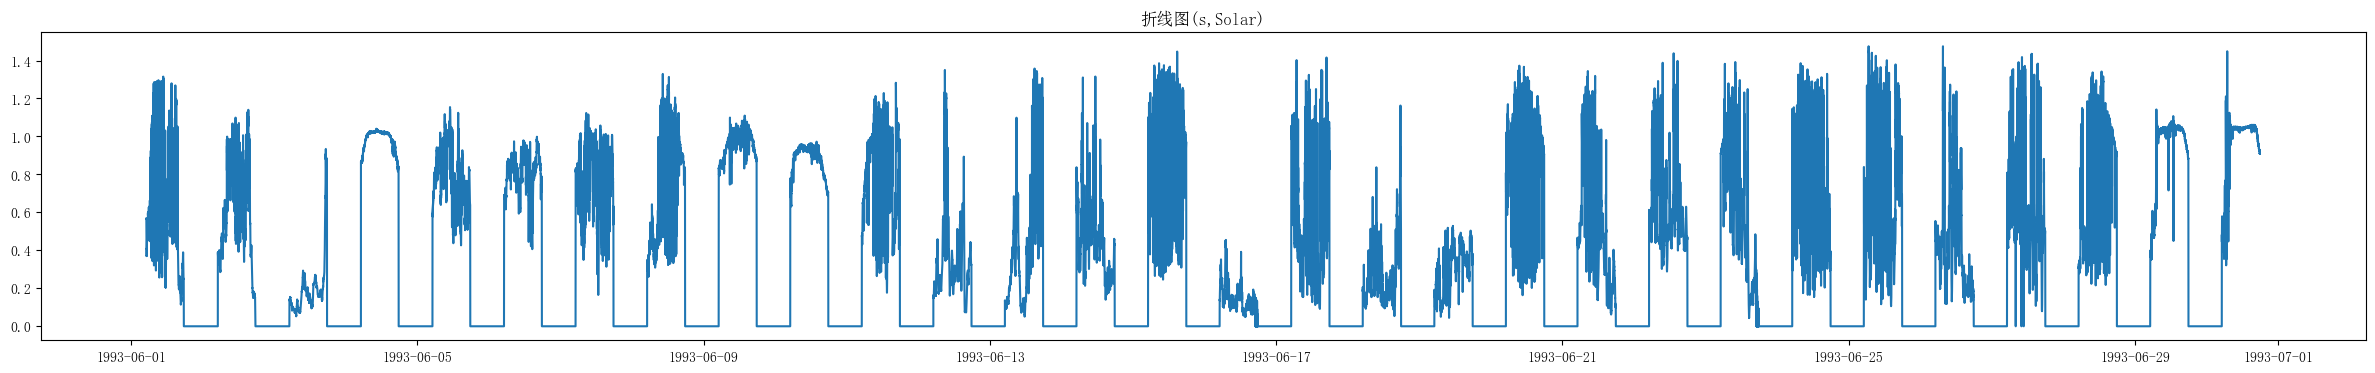

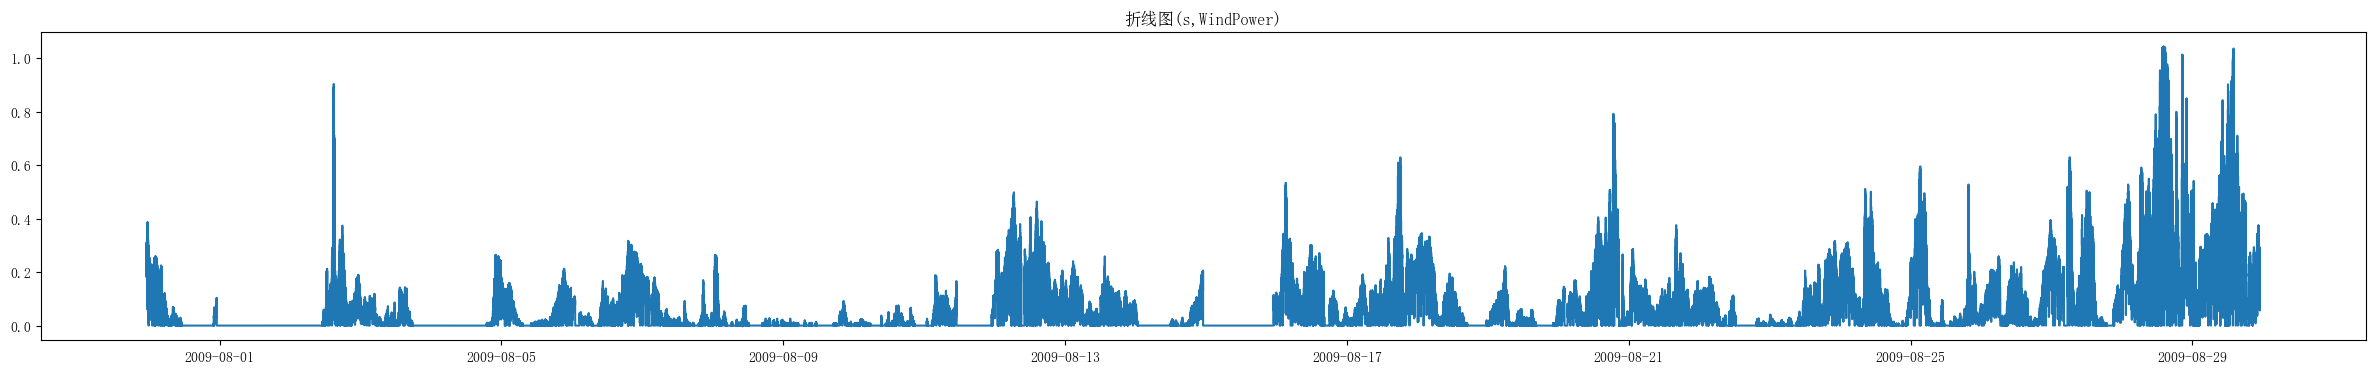

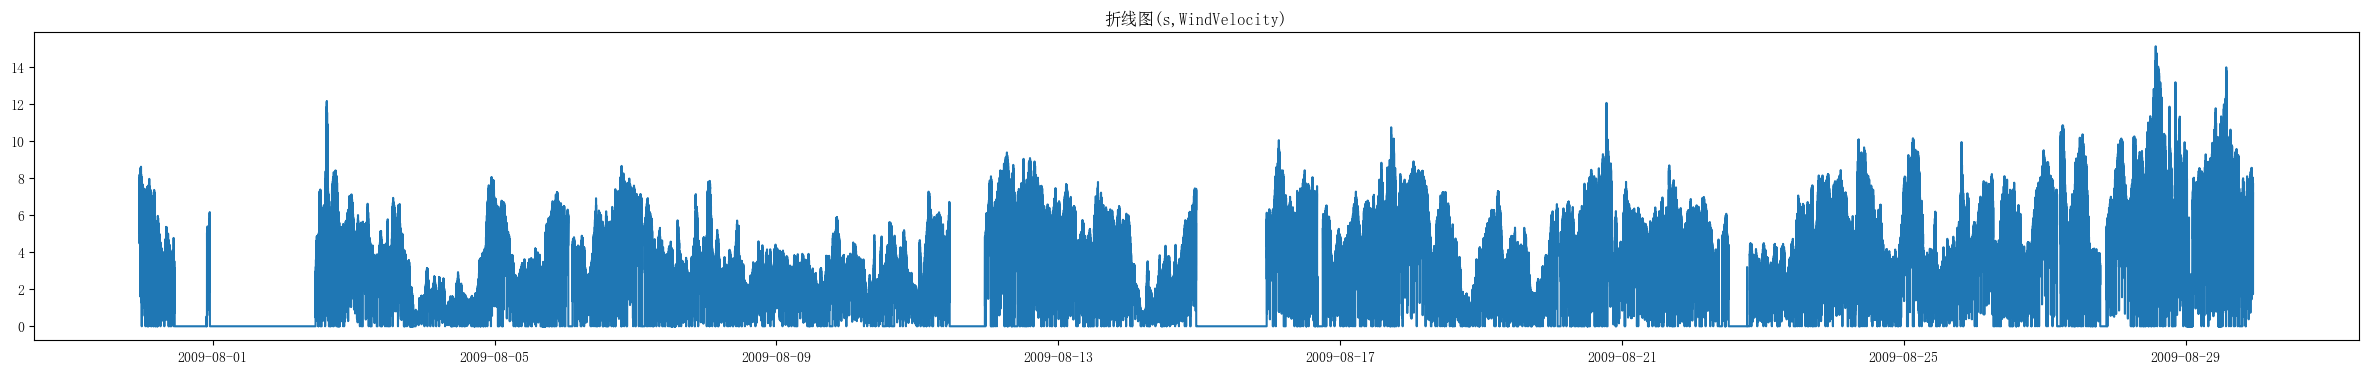

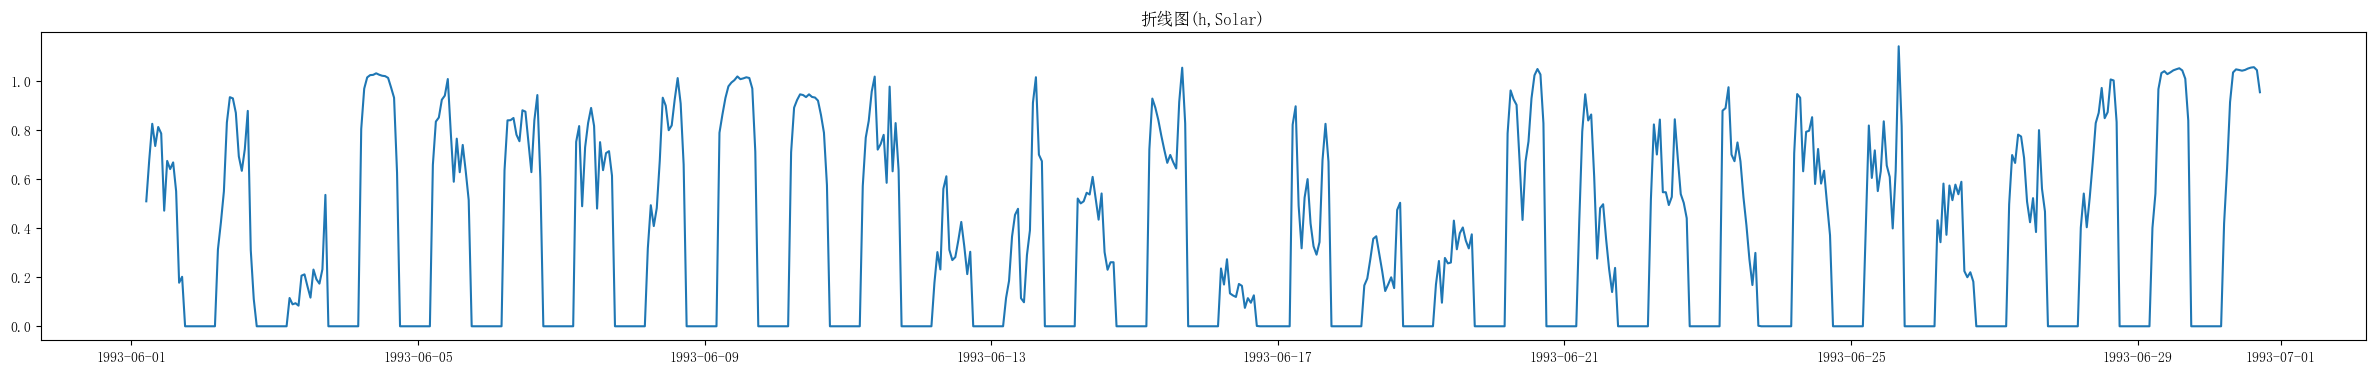

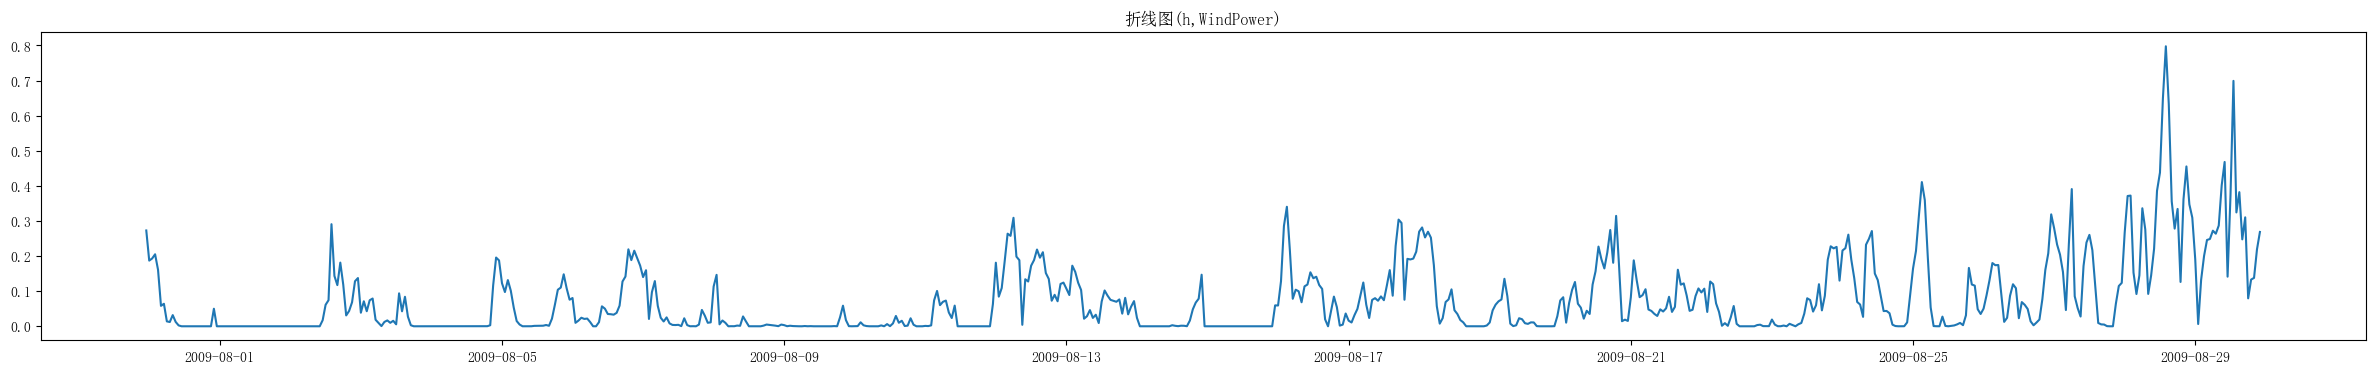

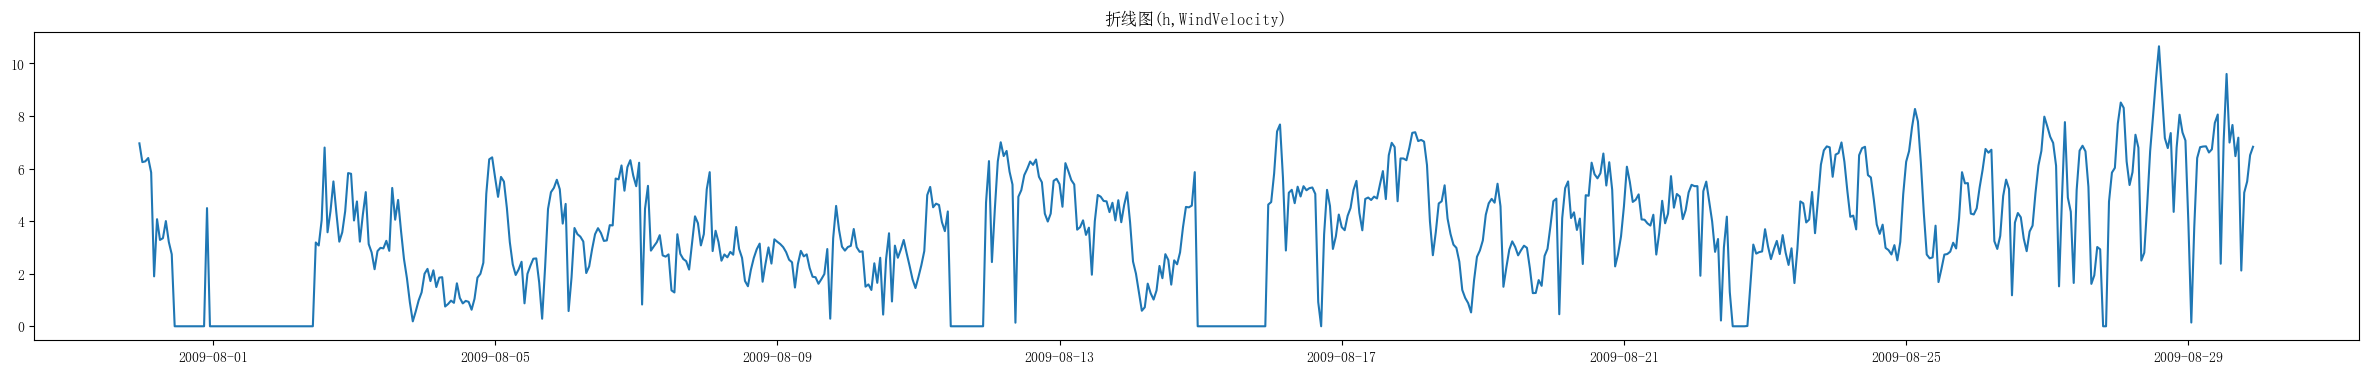

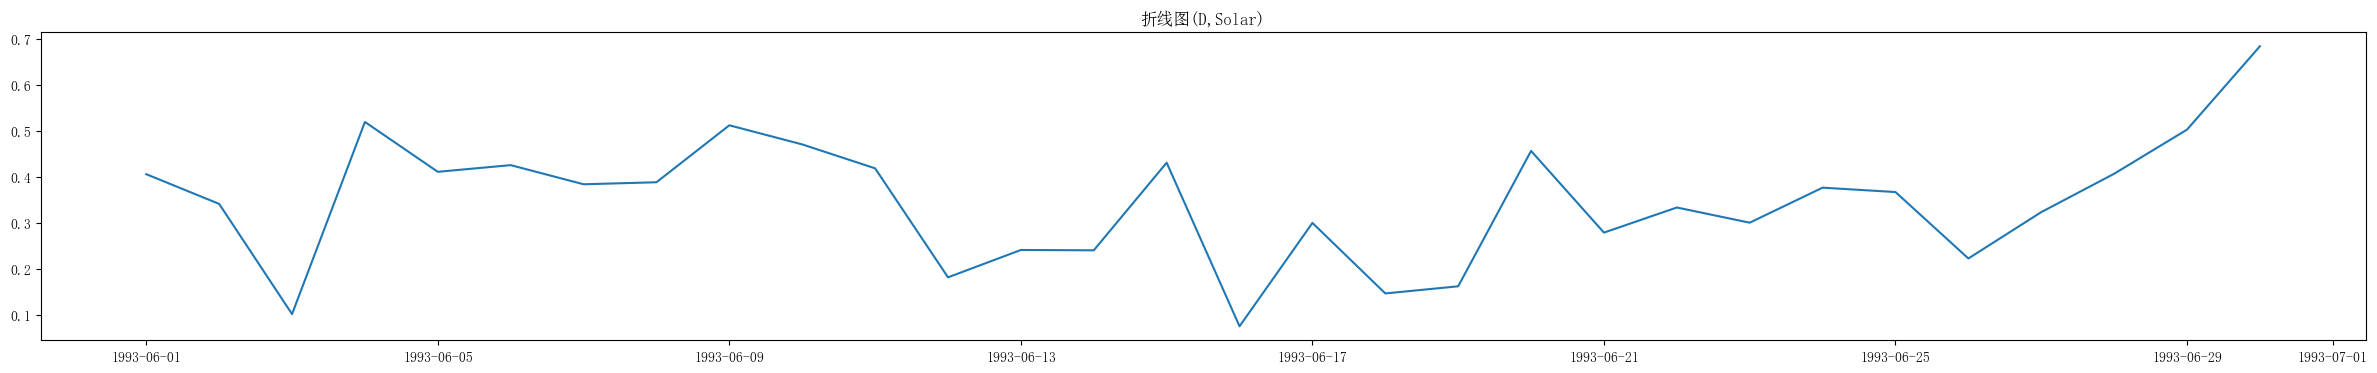

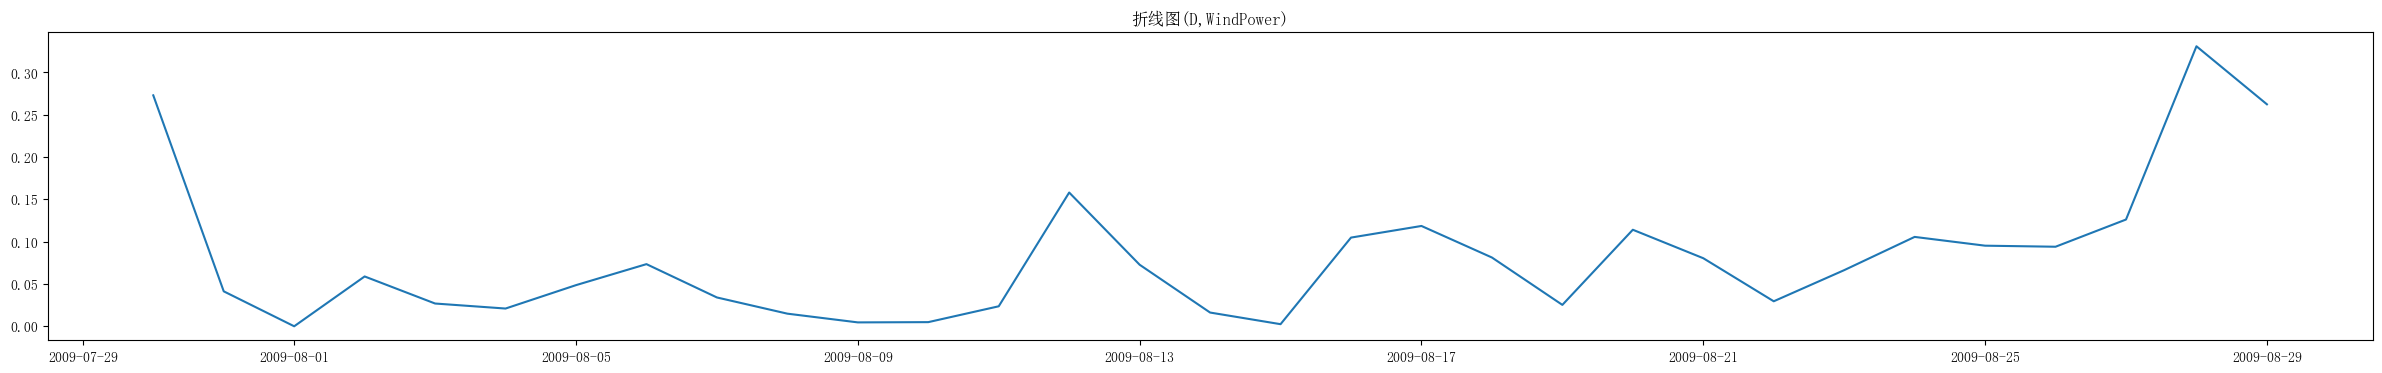

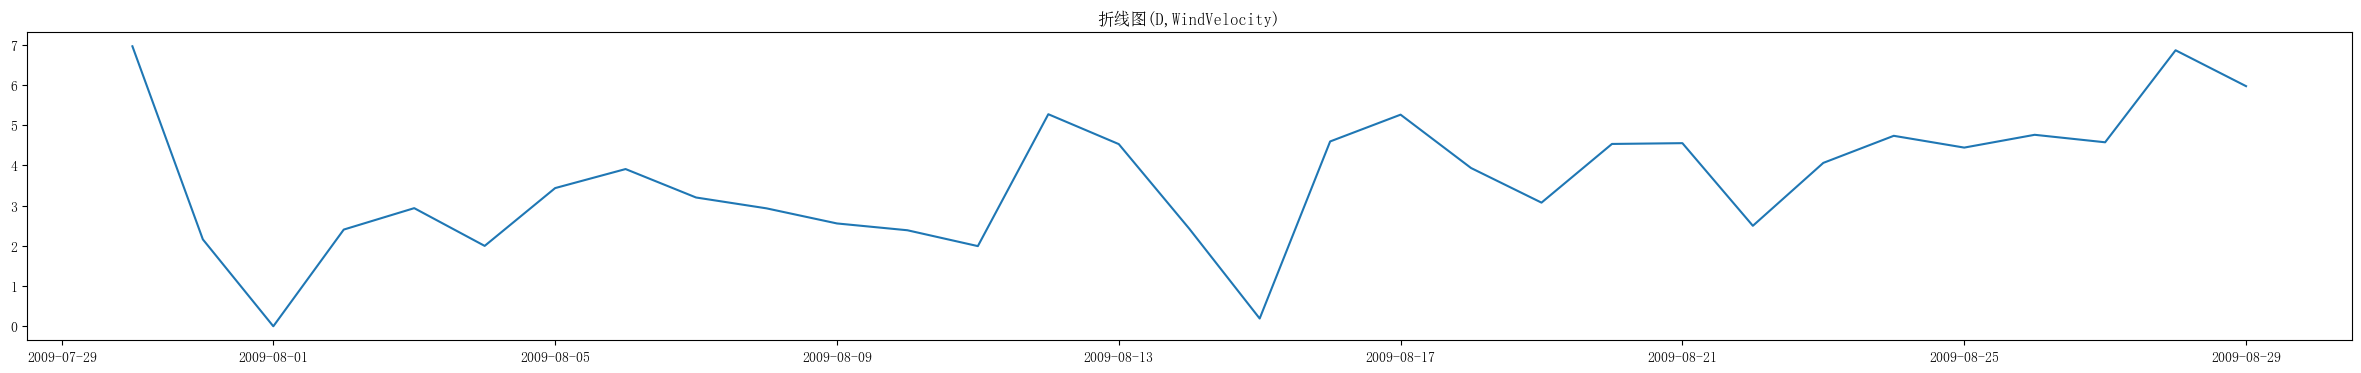

In [2]:
# 折线图
if PLOT:
    for _T, _dfs in zip(["s", "h", "D"], [dfs, dfs_h, dfs_day]):
        for ds, df in zip(DataSet, _dfs):
            plot_hook(
                lambda: plt.plot(df.loc[:, "value"]),
                title=f"折线图({_T},{ds.name})",
                **plot_kw,
            )

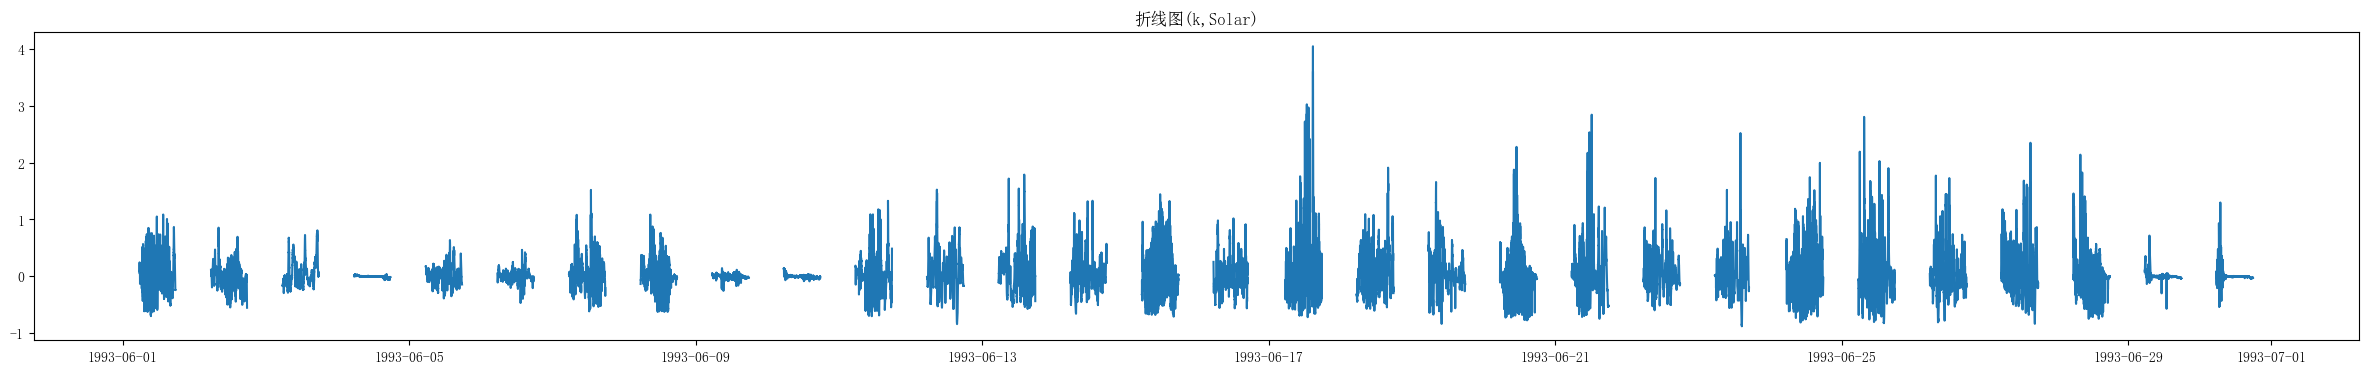

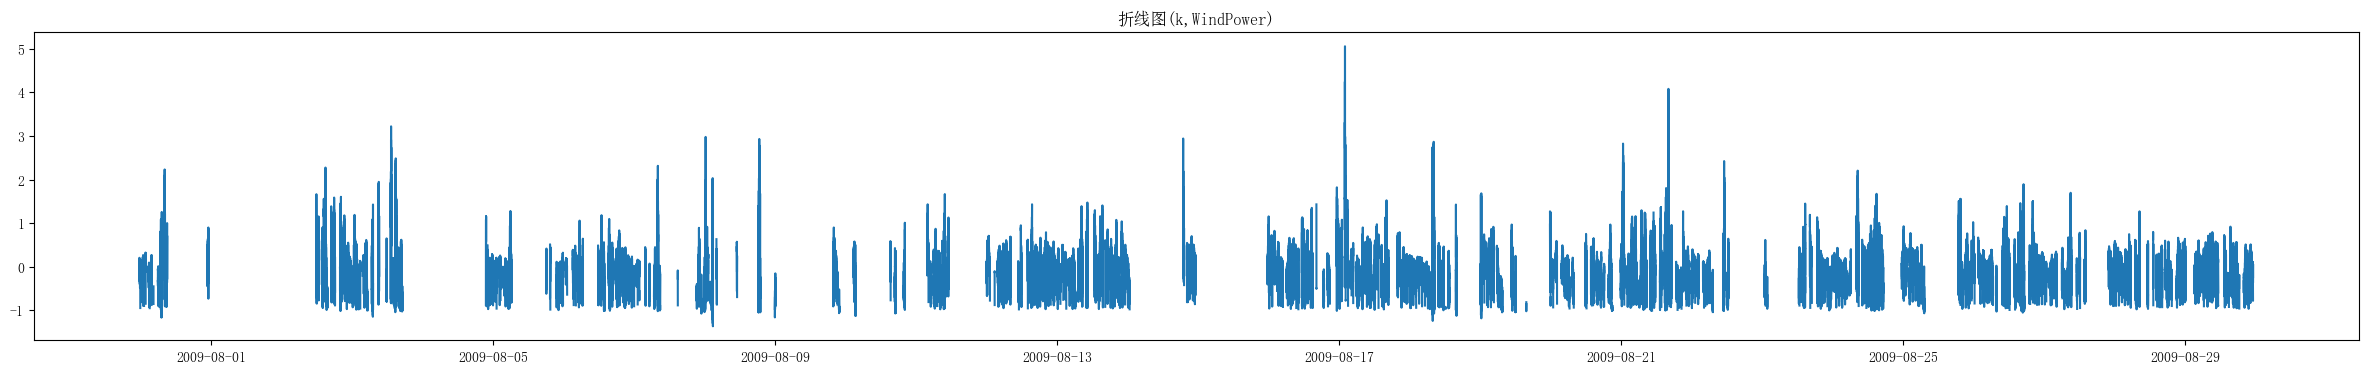

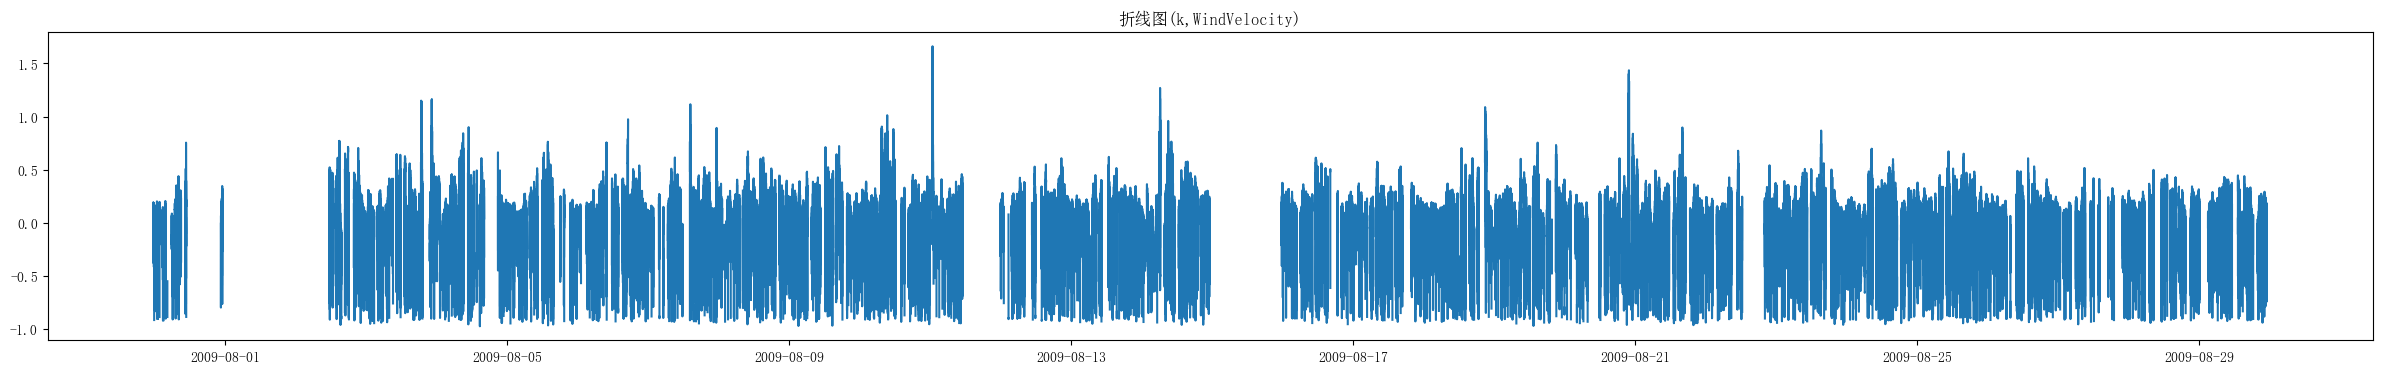

In [3]:
# 波动幅度折线图
if PLOT:
    for ds, df in zip(DataSet, dfs):
        ts = df.loc[:, "value"]
        to_nan = 0  # if ds == DataSet.Solar else None
        k = KTransformer(window=30 * 60, to_nan=to_nan).transform(ts)
        plot_hook(lambda: plt.plot(k), title=f"折线图(k,{ds.name})", **plot_kw)

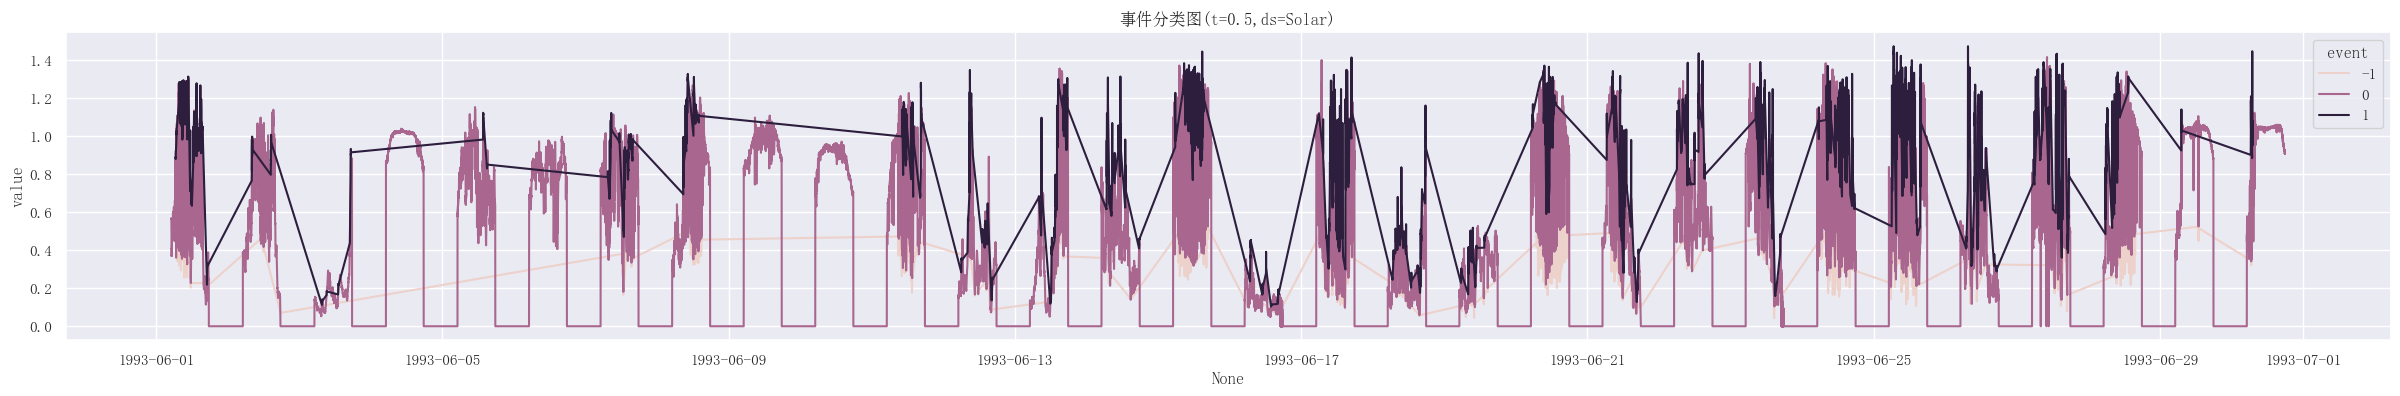

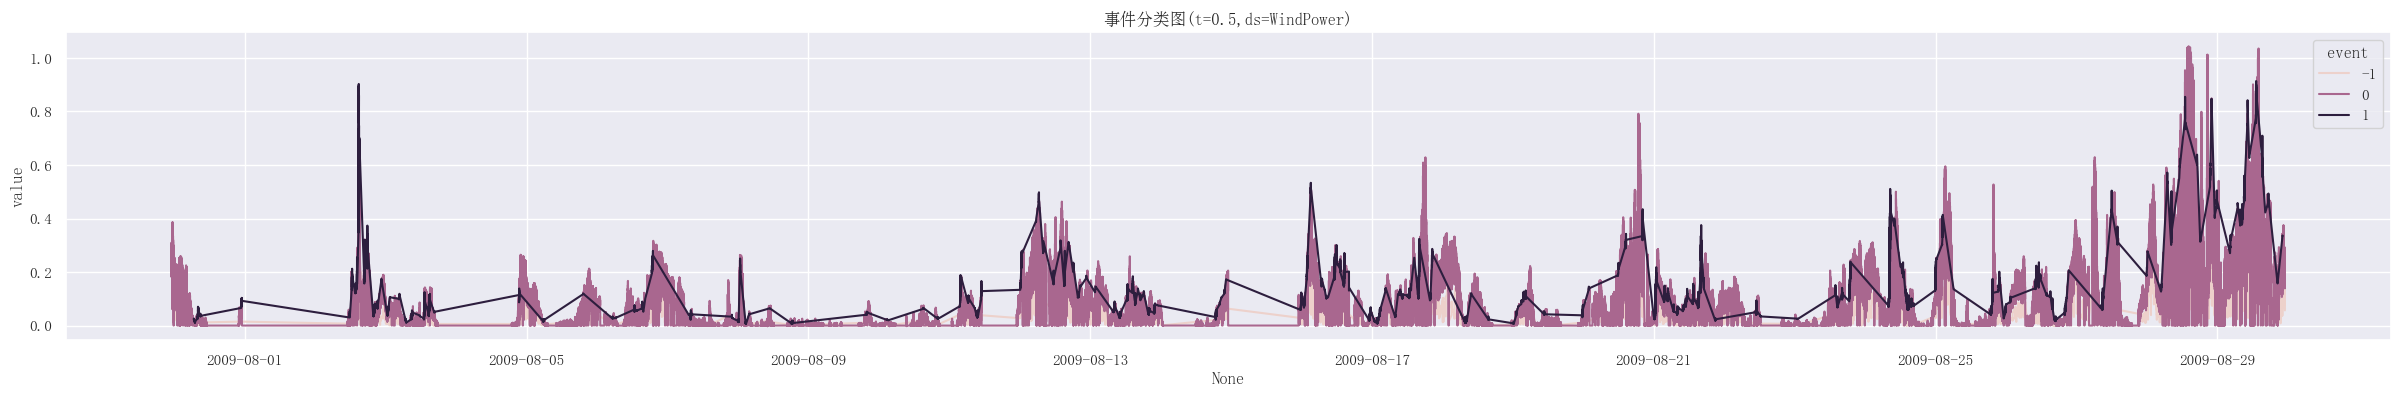

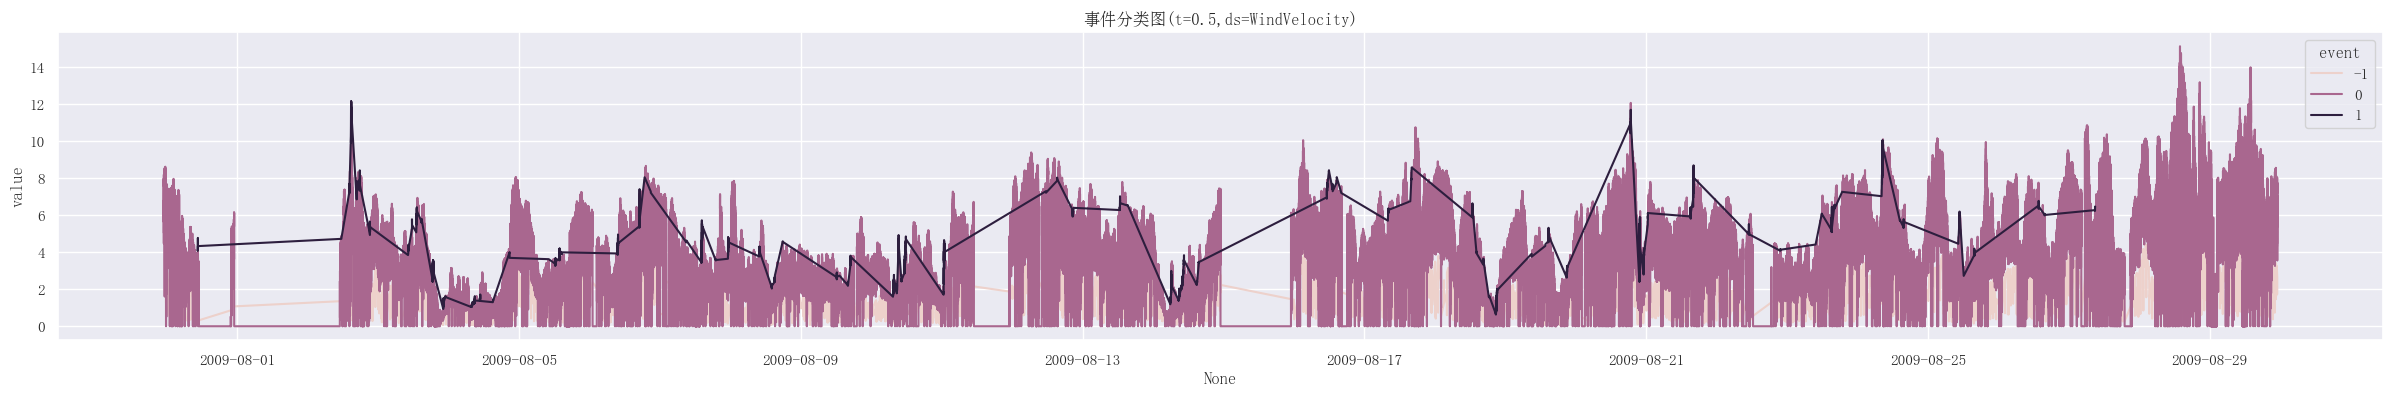

In [22]:
from mylib.transformer import EventClassifier

t = 0.5
for ds, df in zip(DataSet, dfs):
    df = df.copy()
    df["k"] = KTransformer(window=30 * 60, to_nan=to_nan).transform(df.loc[:, "value"])
    df["event"] = EventClassifier(t=t).transform(df.loc[:, "k"])
    plot_hook(
        lambda: sns.lineplot(df, x=df.index, y="value", hue="event"),
        title=f"事件分类图(t={t},ds={ds.name})",
        **plot_kw,
    )